# Basic UMAP Parameters

UMAP is a fairly flexible non-linear dimension reduction algorithm. It seeks to learn the manifold structure of your data and find a low dimensional embedding that preserves the essential topological structure of that manifold. In this notebook we will generate some visualisable 4-dimensional data, demonstrate how to use UMAP to provide a 2-dimensional representation of it, and then look at how various UMAP parameters can impact the resulting embedding. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap
%matplotlib inline

In [4]:
sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})

Next we will need some data to embed into a lower dimensional representation. To make the 4-dimensional data “visualisable” we will generate data uniformly at random from a 4-dimensional cube such that we can interpret a sample as a tuple of (R,G,B,a) values specifying a color (and translucency). Thus when we plot low dimensional representations each point can be colored according to its 4-dimensional value. For this we can use **numpy**. We will fix a random seed for the sake of consistency.

In [5]:
np.random.seed(42)
data = np.random.rand(800, 4)

In [8]:
data

array([[0.37454012, 0.95071431, 0.73199394, 0.59865848],
       [0.15601864, 0.15599452, 0.05808361, 0.86617615],
       [0.60111501, 0.70807258, 0.02058449, 0.96990985],
       ...,
       [0.8285556 , 0.78929285, 0.30779583, 0.91378844],
       [0.95281502, 0.32674254, 0.35442495, 0.50563415],
       [0.94112081, 0.87631943, 0.10256796, 0.39273074]])

Now we need to find a low dimensional representation of the data. As in the Basic Usage documentation, we can do this by using the **fit_transform()** method on a **UMAP** object.

In [9]:
fit = umap.UMAP()
%time u = fit.fit_transform(data)

CPU times: user 10.1 s, sys: 182 ms, total: 10.2 s
Wall time: 8.98 s


In [10]:
u

array([[ 7.527988 ,  7.9496965],
       [ 4.529954 ,  9.689141 ],
       [ 1.9998355,  9.51247  ],
       ...,
       [ 1.7613555, 10.737941 ],
       [ 0.4817872, 10.00326  ],
       [ 1.9430319,  5.713915 ]], dtype=float32)

The resulting value **u** is a 2-dimensional representation of the data. We can visualise the result by using **matplotlib** to draw a scatter plot of **u**. We can color each point of the scatter plot by the associated 4-dimensional color from the source data.

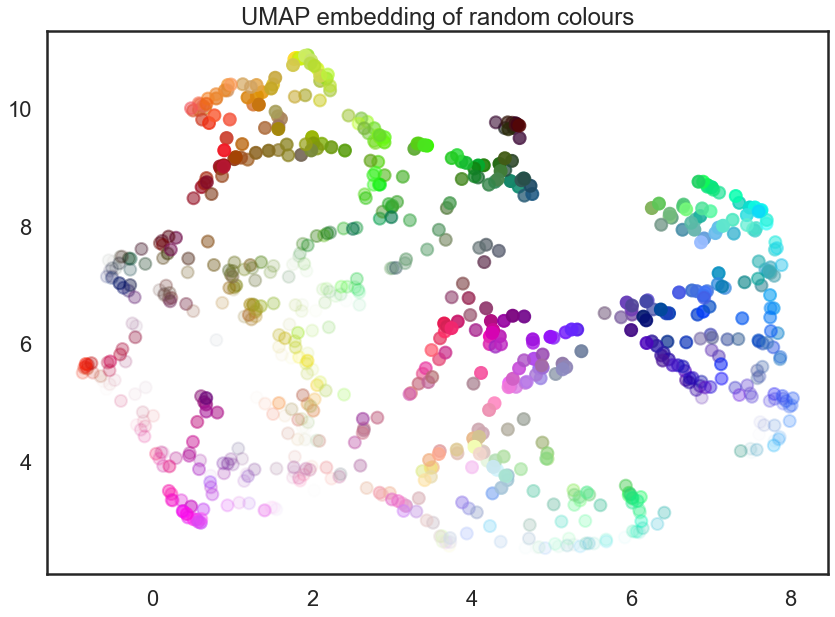

In [13]:
plt.scatter(u[:,0], u[:,1], c=data)
plt.title('UMAP embedding of random colours');

As you can see the result is that the data is placed in 2-dimensional space such that points that were nearby in 4-dimensional space (i.e. are similar colors) are kept close together. Since we drew a random selection of points in the color cube there is a certain amount of induced structure from where the random points happened to clump up in color space.

UMAP has several hyperparameters that can have a significant impact on the resulting embedding. In this notebook we will be covering the four major ones:
        
   - n_neighbors
   - min_dist
   - n_components
   - metric

Each of these parameters has a distinct effect, and we will look at each in turn. To make exploration simpler we will first write a short utility function that can fit the data with UMAP given a set of parameter choices, and plot the result.

In [16]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=data)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=data)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=data, s=100)
    plt.title(title, fontsize=18)

## n_neighbors

This parameter controls how UMAP balances local versus global structure in the data. It does this by constraining the size of the local neighborhood UMAP will look at when attempting to learn the manifold structure of the data. This means that low values of <code> n_neighbors </code> will force UMAP to concentrate on very local structure (potentially to the detriment of the big picture), while large values will push UMAP to look at larger neighborhoods of each point when estimating the manifold structure of the data, losing fine detail structure for the sake of getting the broader of the data.

We can see that in practice by fitting our dataset with UMAP using a range of <code> n_neighbors </code> values. The default value of <code> n_neighbors </code> for UMAP (as used above) is 15, but we will look at values ranging from 2 (a very local view of the manifold) up to 200 (a quarter of the data).

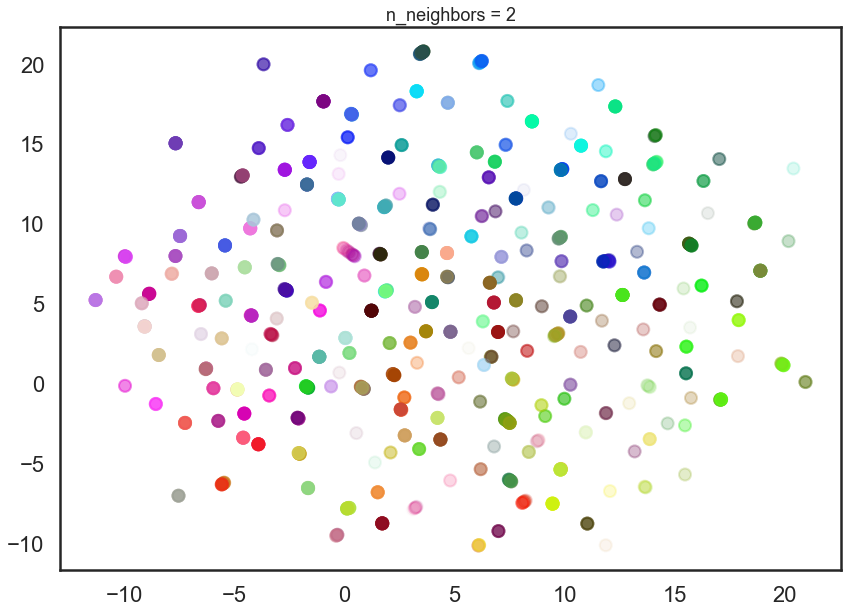

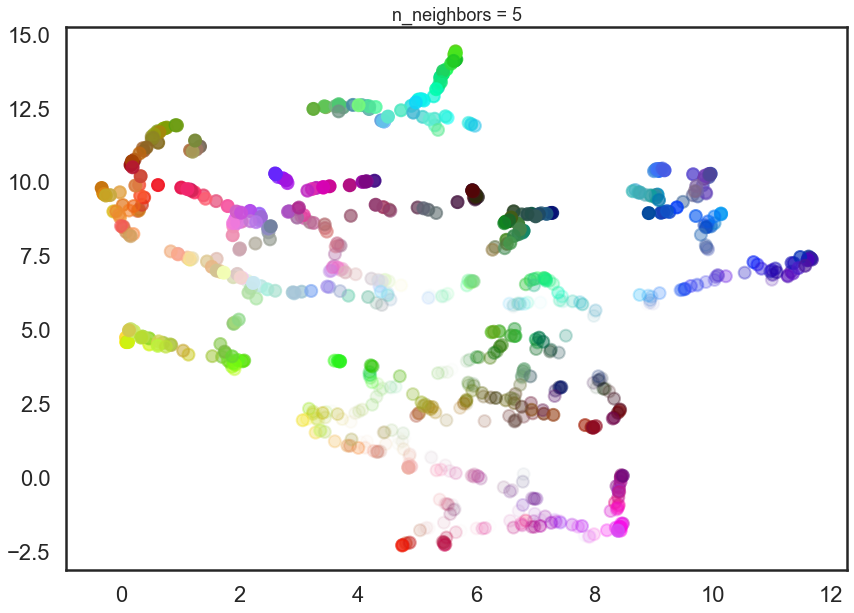

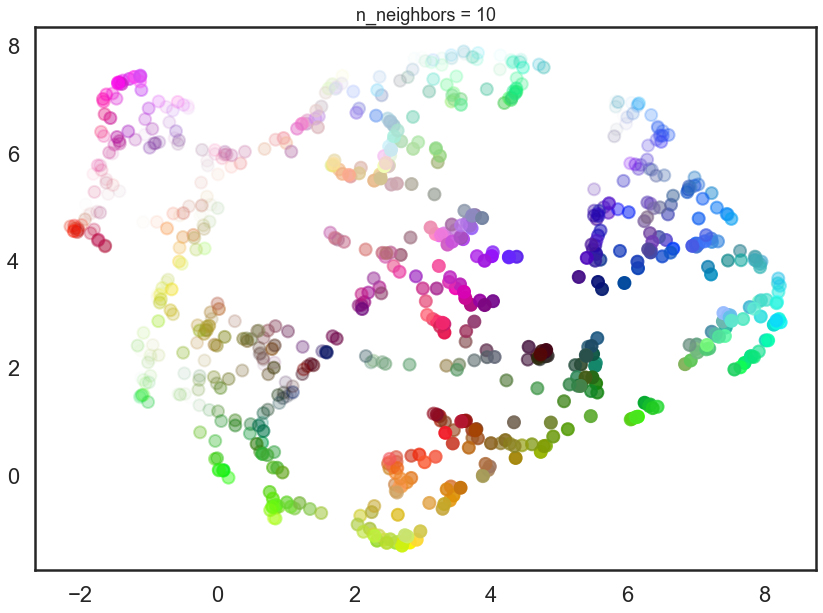

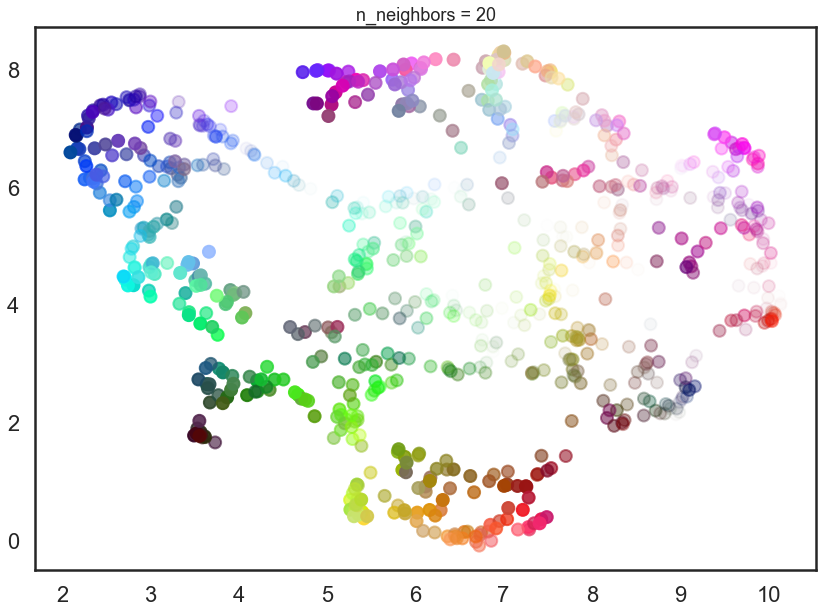

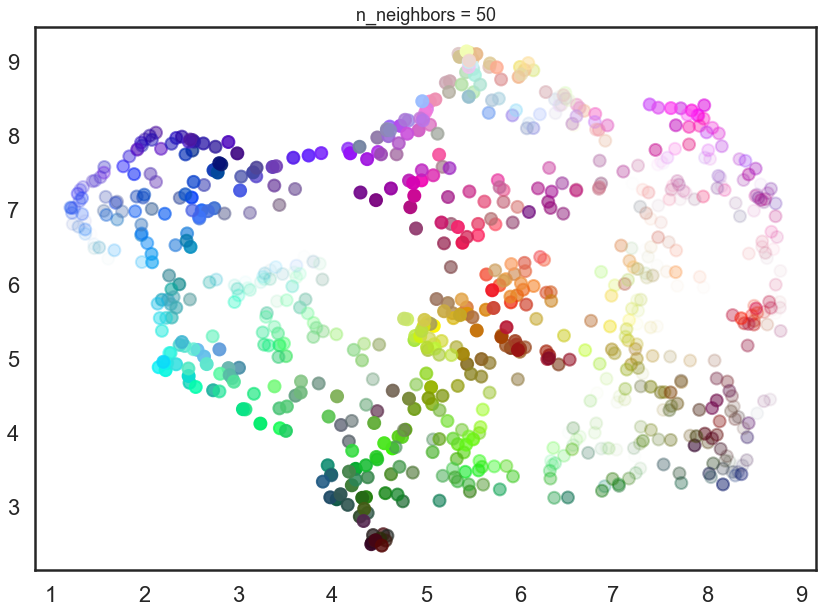

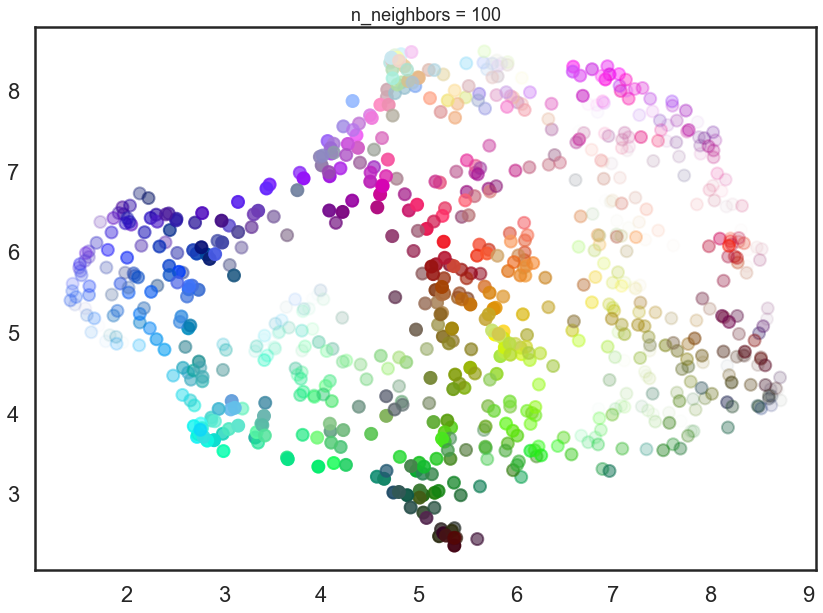

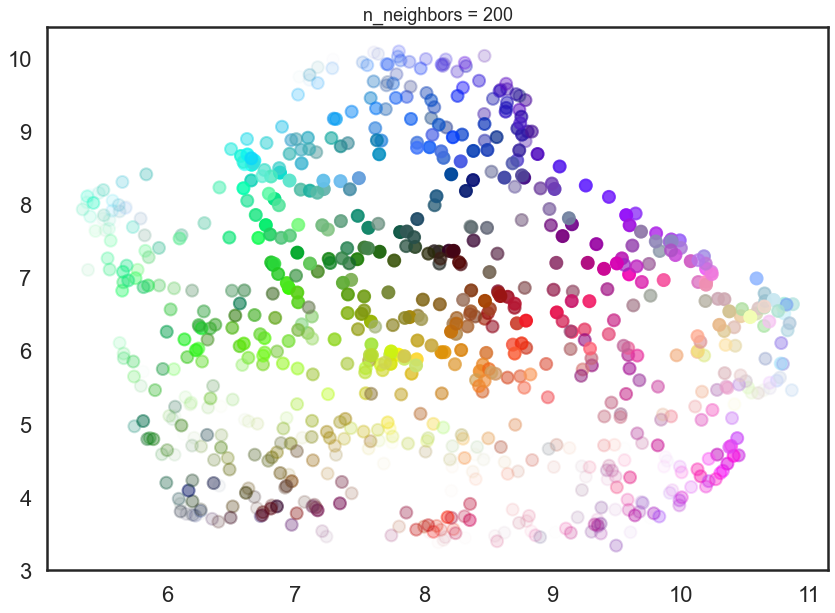

In [17]:
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

With a value of <code> n_neighbors=2 </code> we see that UMAP merely glues together small chains, but due to the narrow/local view, fails to see how those connect together. It also leaves many different components (and even singleton points). This represents the fact that from a fine detail point of view the data is very disconnected and scattered throughout the space.

As <code> n_neighbors </code> is increased UMAP manages to see more of the overall structure of the data, gluing more components together, and better coverying the broader structure of the data. By the stage of <code >n_neighbors=20 </code> we have a fairly good overall view of the data showing how the various colors interelate to each other over the whole dataset.

As <code> n_neighbors </code> increases further more and more focus in placed on the overall structure of the data. This results in, with <code> n_neighbors=200 </code> a plot where the overall structure (blues, greens, and reds; high luminance versus low) is well captured, but at the loss of some of the finer local structure (individual colors are no longer necessarily immediately near their closest color match).
   
This effect well exemplifies the local/global tradeoff provided by <code> n_neighbors </code>.